# Time Benchmark

In [1]:
"""Import from parent directory."""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

Loading validation pickle...
Original image #1


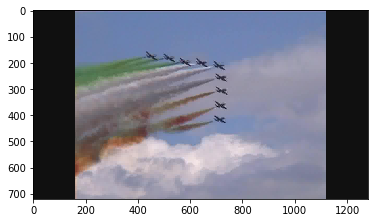

Cropped image (anchor)


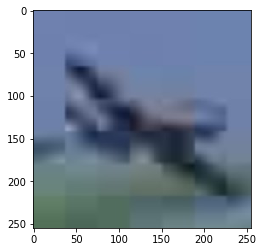

Original image #2


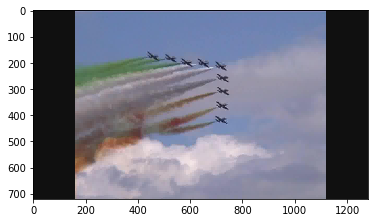

Cropped image (positive)


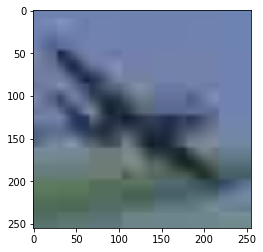

Random crops (negatives)


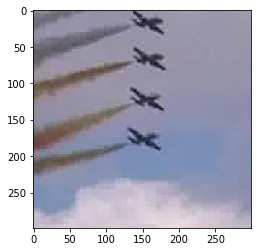

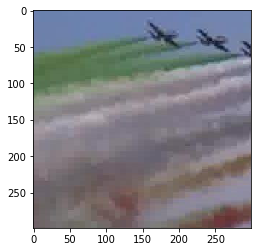

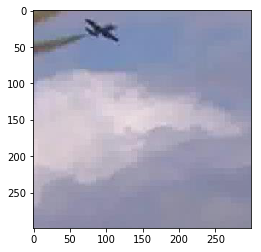

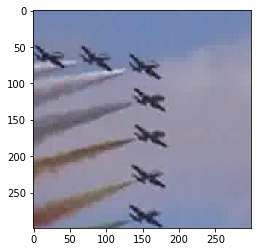

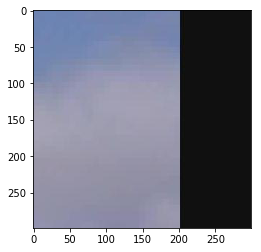

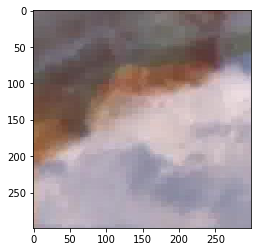

In [6]:
import matplotlib.pyplot as plt
from imageio import imread

from dataset.imagenetvid.curate_imagenet import \
_get_snippets_dict, _get_random_frame_annotation, \
_get_cropped_framepath, _get_original_framepath, \
_get_object, _make_return_random_crops

snippets_dict = _get_snippets_dict(False)
snippets = [a[0] for a in snippets_dict['multiple_bboxes'][:5]]

print("Original image #1")
random_frame = _get_random_frame_annotation(snippets[0])
original_framepath = _get_original_framepath(random_frame, False)
plt.imshow(imread(original_framepath)) 
plt.show()

print("Cropped image (anchor)")
cropped_framepath = _get_cropped_framepath(random_frame, '0', False)
anchor = imread(cropped_framepath)
plt.imshow(anchor)
plt.show()

print("Original image #2")
random_frame2 = _get_random_frame_annotation(snippets[0])
original_framepath = _get_original_framepath(random_frame2, False)
plt.imshow(imread(original_framepath)) 
plt.show()

print("Cropped image (positive)")
cropped_framepath = _get_cropped_framepath(random_frame2, '0', False)
positive = imread(cropped_framepath)
plt.imshow(positive)
plt.show()

print("Random crops (negatives)")
obj = _get_object(random_frame, '0')
random_crops = _make_return_random_crops(random_frame2, 6, False, size=(299, 299),
    black_area=obj, iou_limit=0.2)
random_crops = [imread(im) for im in random_crops]
for im in random_crops:
    plt.imshow(im) 
    plt.show()

In [22]:
# batch = [(anchor, 0), (positive, 0)] + [(neg, 1) for neg in random_crops]
batch = ( [np.array(anchor), np.array(positive)] + [np.array(x) for x in random_crops] ,\
         [0, 0] + [1] * len(random_crops) )
inputs = [np.array(anchor), np.array(positive)] + [np.array(x) for x in random_crops]

In [23]:
import argparse
import os
import time

import numpy as np
import tensorflow as tf

from model.model_fn import model_fn
from model.utils import Params

MODEL_DIR = 'experiments/nologits5'

tf.reset_default_graph()
tf.logging.set_verbosity(tf.logging.INFO)

tf.logging.info("Loading the parameters...")
json_path = os.path.join(MODEL_DIR, 'params.json')
assert os.path.isfile(json_path), "No json configuration file found at {}".format(json_path)
params = Params(json_path)

tf.logging.info("Creating the model...")
estimator = tf.estimator.Estimator(model_fn, params=params, model_dir=MODEL_DIR)

INFO:tensorflow:Loading the parameters...
INFO:tensorflow:Creating the model...
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_model_dir': 'experiments/nologits5', '_is_chief': True, '_master': '', '_num_worker_replicas': 1, '_tf_random_seed': None, '_evaluation_master': '', '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0e1bb08668>, '_task_type': 'worker', '_global_id_in_cluster': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [31]:
from dataset.imagenetvid.input_fn import _imagenet_input_fn

tf.logging.info("Predicting...")

def iterator():
    yield inputs
    
input_fn = lambda: _imagenet_input_fn(params, iterator)
res = estimator.predict(input_fn)

INFO:tensorflow:Predicting...


In [32]:
for r in res:
    print(r)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from experiments/nologits5/model.ckpt-20101


InternalError: Dst tensor is not initialized.
	 [[Node: save/RestoreV2/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_8_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: save/RestoreV2/_1592 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_1598_save/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save/RestoreV2:214)]]